# **Challenge Telecom X: Análise de Evasão de Clientes**
### Dicionário de dados ###

**customerID**: número de identificação único de cada cliente.
**Churn**: se o cliente deixou ou não a empresa.
**gender**: gênero (masculino e feminino).
**SeniorCitizen**: informação sobre um cliente ter ou não idade igual ou maior que 65 anos.
**Partner**: se o cliente possui ou não um parceiro ou parceira.
**Dependents**: se o cliente possui ou não dependentes.
**tenure**: meses de contrato do cliente.
**PhoneService**: assinatura de serviço telefônico.
**MultipleLines**: assisnatura de mais de uma linha de telefone.
**InternetService**: assinatura de um provedor internet.
**OnlineSecurity**: assinatura adicional de segurança online.
**OnlineBackup**: assinatura adicional de backup online.
**DeviceProtection**: assinatura adicional de proteção no dispositivo.
**TechSupport**: assinatura adicional de suporte técnico, menos tempo de espera.
**StreamingTV**: assinatura de TV a cabo.
**StreamingMovies**: assinatura de streaming de filmes.
**Contract**: tipo de contrato.
**PaperlessBilling**: se o cliente prefere receber online a fatura.
**PaymentMethod**: forma de pagamento.
**Charges.Monthly**: total de todos os serviços do cliente por mês.
**Charges.Total**: total gasto pelo cliente.

# **📌 Extracão**

In [36]:
# Importações de Bibliotecas para a utilização
import requests
import pandas as pd # Útil para dados estruturados
import json # Útil para imprimir JSON de forma legível
import numpy as np # Útil para dados numéricos
import matplotlib.pyplot as plt # Útil para visualização de dados
import seaborn as sns # Útil para visualização de dados

In [37]:
# Extração dos Dados
url = 'https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json'
response = requests.get(url)
data = response.json()

In [38]:
# Definição do Dataframe e demonstração dos dados JSON
df_url = url
df = pd.read_json(df_url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [39]:
# Normalização dos dados em JSON
df_normalizado = pd.json_normalize(data)
df_normalizado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [40]:
# Informações sobre as colunas do Dataframe
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [41]:
# Dimensões do dataframe
df_normalizado.shape # (Quantidade de dados, quantidade de colunas)

(7267, 21)

# **🔧 Transformação**

✅ *Variáveis Demográficas*. **customerID**: Apenas identificador único. Não relevante para modelagem. **gender**: Pode ser explorado para verificar se há diferença na evasão por gênero. **SeniorCitizen**: Importante! Idosos podem ter comportamentos distintos na adesão e cancelamento de serviços. **Partner**: Ter ou não parceiro pode indicar estabilidade ou perfil de consumo. **Dependents**: Clientes com dependentes podem ter diferentes necessidades de serviço.

✅ *Variáveis de Contrato*. **tenure**: Fundamental! Clientes há mais tempo geralmente são mais fiéis, ou o contrário. **Contract**: Muito relevante! Tipos de contrato (mensal, anual, etc.) influenciam fortemente a decisão de churn. **PaperlessBilling**: Pode indicar perfil mais digital ou preferência tradicional. **PaymentMethod**: Certos métodos de pagamento podem ter relação com evasão, como dificuldades ou preferências.

✅ *Variáveis de Serviços*. **PhoneService**: Ter ou não telefone pode indicar perfil mais tradicional ou digital. **MultipleLines**: Mais de uma linha pode indicar maior envolvimento ou necessidade. **InternetService**: Fundamental! Sem internet, diversos serviços adicionais não se aplicam. **OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport**: Todos indicam engajamento com serviços adicionais, potencialmente reduzindo a chance de churn. **StreamingTV, StreamingMovies**: Serviços de entretenimento que podem fidelizar ou, se insatisfatórios, incentivar o churn.

✅ *Variáveis Financeiras*. **Charges.Monthly**: Valor mensal que pode impactar a decisão de saída — clientes que pagam muito podem ter maior insatisfação. **Charges.Total**: Pode indicar relação de longo prazo e investimento acumulado.

✅ *Considerações importantes*. **Correlação entre variáveis**: Por exemplo, quem tem InternetService provavelmente terá outros serviços como OnlineBackup.
**Multicolinearidade**: Variáveis muito correlacionadas podem confundir a análise, sendo importante analisá-las com técnicas estatísticas.
**Engajamento vs. Custo**: Clientes que usam mais serviços tendem a pagar mais, mas podem ser mais fiéis.



In [42]:
# Pré-processamento
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Modelagem
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

1. Variável Alvo (Target) **Churn**: É a variável principal da análise. Indica se o cliente deixou ou não a empresa. (Binária: "Yes" ou "No")

In [43]:
# Informações gerais
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [44]:
# Verificação de valores nulos
df_normalizado.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [45]:
# Verificar valores ausentes
missing_values = df_normalizado.isnull().sum()
print("Valores ausentes por coluna:\n", missing_values)


Valores ausentes por coluna:
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [46]:
# Verificar duplicados
duplicates = df_normalizado.duplicated().sum()
print(f"Número de registros duplicados: {duplicates}")

Número de registros duplicados: 0


In [47]:
# Tipos de dados
print(df.dtypes)

# Valores únicos em colunas categóricas para detectar inconsistências
for col in df_normalizado.select_dtypes(include='object').columns:
    print(f"Coluna {col}: {df_normalizado[col].unique()}")


customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object
Coluna customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Coluna Churn: ['No' 'Yes' '']
Coluna customer.gender: ['Female' 'Male']
Coluna customer.Partner: ['Yes' 'No']
Coluna customer.Dependents: ['Yes' 'No']
Coluna phone.PhoneService: ['Yes' 'No']
Coluna phone.MultipleLines: ['No' 'Yes' 'No phone service']
Coluna internet.InternetService: ['DSL' 'Fiber optic' 'No']
Coluna internet.OnlineSecurity: ['No' 'Yes' 'No internet service']
Coluna internet.OnlineBackup: ['Yes' 'No' 'No internet service']
Coluna internet.DeviceProtection: ['No' 'Yes' 'No internet service']
Coluna internet.TechSupport: ['Yes' 'No' 'No internet service']
Coluna internet.StreamingTV: ['Yes' 'No' 'No internet service']
Coluna internet.StreamingMovies: ['No' 'Yes' 'No internet service']
Coluna account.Contract: ['One year' 'Month-to-m

In [52]:
# Conferir categorias não esperadas
for col in df_normalizado.select_dtypes(include='object').columns:
    print(f"Coluna {col}: {df_normalizado[col].unique()}")


Coluna customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Coluna Churn: ['No' 'Yes']
Coluna customer.gender: ['Female' 'Male']
Coluna customer.Partner: ['Yes' 'No']
Coluna customer.Dependents: ['Yes' 'No']
Coluna phone.PhoneService: ['Yes' 'No']
Coluna phone.MultipleLines: ['No' 'Yes']
Coluna internet.InternetService: ['DSL' 'Fiber optic' 'No']
Coluna internet.OnlineSecurity: ['No' 'Yes']
Coluna internet.OnlineBackup: ['Yes' 'No']
Coluna internet.DeviceProtection: ['No' 'Yes']
Coluna internet.TechSupport: ['Yes' 'No']
Coluna internet.StreamingTV: ['Yes' 'No']
Coluna internet.StreamingMovies: ['No' 'Yes']
Coluna account.Contract: ['One year' 'Month-to-month' 'Two year']
Coluna account.PaperlessBilling: ['Yes' 'No']
Coluna account.PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Coluna account.Charges.Total: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


✅ **Análise e possíveis inconsistências:**

In [53]:
# Coluna Churn: Há um valor vazio (''), que deve ser tratado como nulo ou excluído.
df_normalizado['Churn'] = df_normalizado['Churn'].replace('', np.nan)

# Função para resolver os dados nulos
df_normalizado.dropna(subset=['Churn'], inplace=True)
df_normalizado['Churn'].isnull().sum()


np.int64(0)

In [54]:
#  Coluna phone.MultipleLines: 'No phone service' pode ser redundante, pois quem não tem PhoneService = 'No' automaticamente não pode ter MultipleLines
df_normalizado['phone.MultipleLines'] = df_normalizado['phone.MultipleLines'].replace({'No phone service': 'No'})

#Verificar se funcionou a função
df_normalizado['phone.MultipleLines'].unique()


array(['No', 'Yes'], dtype=object)

In [55]:
'''Colunas internet.OnlineSecurity, internet.OnlineBackup, internet.DeviceProtection, internet.TechSupport, internet.StreamingTV, internet.StreamingMovies:
  'No internet service' → redundante, já que quem não tem InternetService = 'No' não pode ter esses serviços.'''

cols = ['internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
        'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies']
for col in cols:
    df_normalizado[col] = df_normalizado[col].replace({'No internet service': 'No'})

#Verificar se funcionou a função
for col in cols:
    print(f"Coluna {col}: {df_normalizado[col].unique()}")

Coluna internet.OnlineSecurity: ['No' 'Yes']
Coluna internet.OnlineBackup: ['Yes' 'No']
Coluna internet.DeviceProtection: ['No' 'Yes']
Coluna internet.TechSupport: ['Yes' 'No']
Coluna internet.StreamingTV: ['Yes' 'No']
Coluna internet.StreamingMovies: ['No' 'Yes']


In [56]:
# Coluna account.Charges.Total: Está como string, mas deve ser numérico (float).
df_normalizado['account.Charges.Total'] = pd.to_numeric(df_normalizado['account.Charges.Total'], errors='coerce')

#Verificar se funcionou
df_normalizado['account.Charges.Total'].dtypes

dtype('float64')

📝 Fórmula:
Contas_Diarias = Charges.Monthly / 30

➡️ Consideramos 30 dias como média de um mês.

In [57]:
# Verificar se Charges.Monthly está como numérico

df_normalizado['account.Charges.Monthly'].dtypes

dtype('float64')

In [58]:
# Criar a coluna Contas_Diarias
df_normalizado['account.Contas_Diarias'] = df_normalizado['account.Charges.Monthly'] / 30

#Verificar se funcionou
df_normalizado['account.Contas_Diarias'].head()

,account.Contas_Diarias
0,2.186667
1,1.996667
2,2.463333
3,3.266667
4,2.796667


# ✅ Binzarização de variáveis categóricas:#
Modelos matemáticos (regressão, árvores, etc.) processam melhor números que strings. Variáveis binárias, como Yes / No, devem virar 1 / 0.



In [59]:
bin_cols = ['customer.Partner', 'customer.Dependents', 'phone.PhoneService',
            'phone.MultipleLines', 'internet.OnlineSecurity', 'internet.OnlineBackup',
            'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV',
            'internet.StreamingMovies', 'account.PaperlessBilling', 'Churn']

for col in bin_cols:
    df_normalizado[col] = df_normalizado[col].map({'Yes': 1, 'No': 0})


In [60]:
# Verificação se bin_cols funcionou
df_normalizado[bin_cols].head()

,customer.Partner,customer.Dependents,phone.PhoneService,phone.MultipleLines,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.PaperlessBilling,Churn
0,1,1,1,0,0,1,0,1,1,0,1,0
1,0,0,1,1,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,1,0,0,0,1,1
3,1,0,1,0,0,1,1,0,1,1,1,1
4,1,0,1,0,0,0,0,1,1,0,1,1


# ✅ Tradução/renomeação de colunas:

Melhora compreensão. Facilita para quem não domina inglês ou termos técnicos.

In [62]:
# Renomeando Colunas
df_normalizado.rename(columns={
    'customer.gender': 'Genero',
    'customer.Partner': 'Tem_Parceiro',
    'customer.Dependents': 'Tem_Dependentes',
    'phone.PhoneService': 'Servico_Telefonico',
    'internet.OnlineSecurity': 'Seguranca_Online',
    'internet.OnlineBackup': 'Backup_Online',
    'internet.DeviceProtection': 'Protecao_Dispositivo',
    'internet.TechSupport': 'Suporte_Tecnico',
    'internet.StreamingTV': 'TV_Streaming',
    'internet.StreamingMovies': 'Filmes_Streaming',
    'account.Contract': 'Tipo_Contrato',
    'account.PaymentMethod': 'Metodo_Pagamento',
    'account.Charges.Monthly': 'Cobranca_Mensal',
    'account.Charges.Total': 'Cobranca_Total'
}, inplace=True)

#Verificar se funcionou
df_normalizado.columns


Index(['customerID', 'Churn', 'Genero', 'customer.SeniorCitizen',
       'Tem_Parceiro', 'Tem_Dependentes', 'customer.tenure',
       'Servico_Telefonico', 'phone.MultipleLines', 'internet.InternetService',
       'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo',
       'Suporte_Tecnico', 'TV_Streaming', 'Filmes_Streaming', 'Tipo_Contrato',
       'account.PaperlessBilling', 'Metodo_Pagamento', 'Cobranca_Mensal',
       'Cobranca_Total', 'account.Contas_Diarias'],
      dtype='object')

# ✅ Tratamento de variáveis não-binárias:

Ex.: internet.InternetService, account.Tipo_Contrato, Metodo_Pagamento. Essas colunas com múltiplas categorias podem ser transformadas em dummies:

In [63]:
# Tratamento de variáveis não-binárias
df_normalizado = pd.get_dummies(df_normalizado, columns=['internet.InternetService', 'Tipo_Contrato', 'Metodo_Pagamento'])

#Verificar se funcionou
df_normalizado.columns

Index(['customerID', 'Churn', 'Genero', 'customer.SeniorCitizen',
       'Tem_Parceiro', 'Tem_Dependentes', 'customer.tenure',
       'Servico_Telefonico', 'phone.MultipleLines', 'Seguranca_Online',
       'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico',
       'TV_Streaming', 'Filmes_Streaming', 'account.PaperlessBilling',
       'Cobranca_Mensal', 'Cobranca_Total', 'account.Contas_Diarias',
       'internet.InternetService_DSL', 'internet.InternetService_Fiber optic',
       'internet.InternetService_No', 'Tipo_Contrato_Month-to-month',
       'Tipo_Contrato_One year', 'Tipo_Contrato_Two year',
       'Metodo_Pagamento_Bank transfer (automatic)',
       'Metodo_Pagamento_Credit card (automatic)',
       'Metodo_Pagamento_Electronic check', 'Metodo_Pagamento_Mailed check'],
      dtype='object')

# ✅ Padronização de Genero:

Ex.: ['Female', 'Male']

In [64]:
# Padronização de gênero
df_normalizado['Genero'] = df_normalizado['Genero'].map({'Female': 1, 'Male': 0})

#Verificar se funcionou
df_normalizado['Genero'].head()

,Genero
0,1
1,0
2,0
3,0
4,1


# **📊 Carga e análise**

✅ Resumo estatístico das colunas numéricas: **count** — quantidade de valores não nulos. **mean** — média. **std** — desvio padrão. **min** — valor mínimo. **25%** — primeiro quartil. **50%** — mediana. **75%** — terceiro quartil. **max** — valor máximo



In [65]:
df_normalizado.columns

Index(['customerID', 'Churn', 'Genero', 'customer.SeniorCitizen',
       'Tem_Parceiro', 'Tem_Dependentes', 'customer.tenure',
       'Servico_Telefonico', 'phone.MultipleLines', 'Seguranca_Online',
       'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico',
       'TV_Streaming', 'Filmes_Streaming', 'account.PaperlessBilling',
       'Cobranca_Mensal', 'Cobranca_Total', 'account.Contas_Diarias',
       'internet.InternetService_DSL', 'internet.InternetService_Fiber optic',
       'internet.InternetService_No', 'Tipo_Contrato_Month-to-month',
       'Tipo_Contrato_One year', 'Tipo_Contrato_Two year',
       'Metodo_Pagamento_Bank transfer (automatic)',
       'Metodo_Pagamento_Credit card (automatic)',
       'Metodo_Pagamento_Electronic check', 'Metodo_Pagamento_Mailed check'],
      dtype='object')

In [66]:
df_normalizado.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,7043.0,0.265370,0.441561,0.000000,0.000000,0.000,1.0000,1.000000
Genero,7043.0,0.495244,0.500013,0.000000,0.000000,0.000,1.0000,1.000000
customer.SeniorCitizen,7043.0,0.162147,0.368612,0.000000,0.000000,0.000,0.0000,1.000000
Tem_Parceiro,7043.0,0.483033,0.499748,0.000000,0.000000,0.000,1.0000,1.000000
Tem_Dependentes,7043.0,0.299588,0.458110,0.000000,0.000000,0.000,1.0000,1.000000
customer.tenure,7043.0,32.371149,24.559481,0.000000,9.000000,29.000,55.0000,72.000000
Servico_Telefonico,7043.0,0.903166,0.295752,0.000000,1.000000,1.000,1.0000,1.000000
phone.MultipleLines,7043.0,0.421837,0.493888,0.000000,0.000000,0.000,1.0000,1.000000
Seguranca_Online,7043.0,0.286668,0.452237,0.000000,0.000000,0.000,1.0000,1.000000
Backup_Online,7043.0,0.344881,0.475363,0.000000,0.000000,0.000,1.0000,1.000000


In [67]:
# Média, mediana e desvio padrão de colunas específicas:

for col in ['Cobranca_Mensal', 'Cobranca_Total', 'account.Contas_Diarias']:
    print(f'\nAnálise da coluna: {col}')
    print(f'Média: {df_normalizado[col].mean():.2f}')
    print(f'Mediana: {df_normalizado[col].median():.2f}')
    print(f'Desvio Padrão: {df_normalizado[col].std():.2f}')
    print(f'Valor Mínimo: {df_normalizado[col].min():.2f}')
    print(f'Valor Máximo: {df_normalizado[col].max():.2f}')


Análise da coluna: Cobranca_Mensal
Média: 64.76
Mediana: 70.35
Desvio Padrão: 30.09
Valor Mínimo: 18.25
Valor Máximo: 118.75

Análise da coluna: Cobranca_Total
Média: 2283.30
Mediana: 1397.47
Desvio Padrão: 2266.77
Valor Mínimo: 18.80
Valor Máximo: 8684.80

Análise da coluna: account.Contas_Diarias
Média: 2.16
Mediana: 2.34
Desvio Padrão: 1.00
Valor Mínimo: 0.61
Valor Máximo: 3.96


In [68]:
# Contagem absoluta e relativa de Churn

print("Contagem absoluta de Churn:")
print(df_normalizado['Churn'].value_counts())

print("\nProporção (%):")
print((df_normalizado['Churn'].value_counts(normalize=True) * 100).round(2))


Contagem absoluta de Churn:
Churn
0    5174
1    1869
Name: count, dtype: int64

Proporção (%):
Churn
0    73.46
1    26.54
Name: proportion, dtype: float64


<ipython-input-69-4cd3596b49c8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_normalizado, x='Churn', palette='pastel')


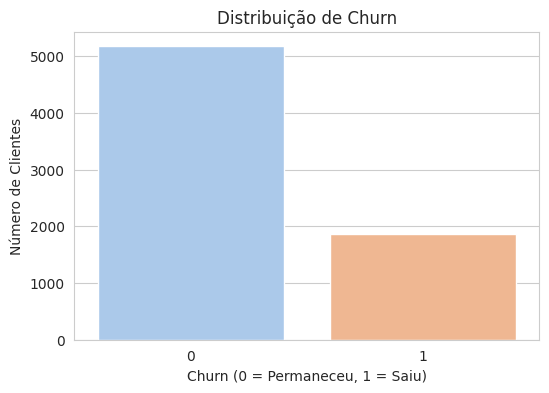

In [69]:
# Gráfico de barras - Contagem de clientes que saíram e ficaram:

plt.figure(figsize=(6,4))
sns.countplot(data=df_normalizado, x='Churn', palette='pastel')
plt.title('Distribuição de Churn')
plt.xlabel('Churn (0 = Permaneceu, 1 = Saiu)')
plt.ylabel('Número de Clientes')
plt.show()


<ipython-input-70-a49ca42c9411>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_normalizado, x='Churn', palette=cores)


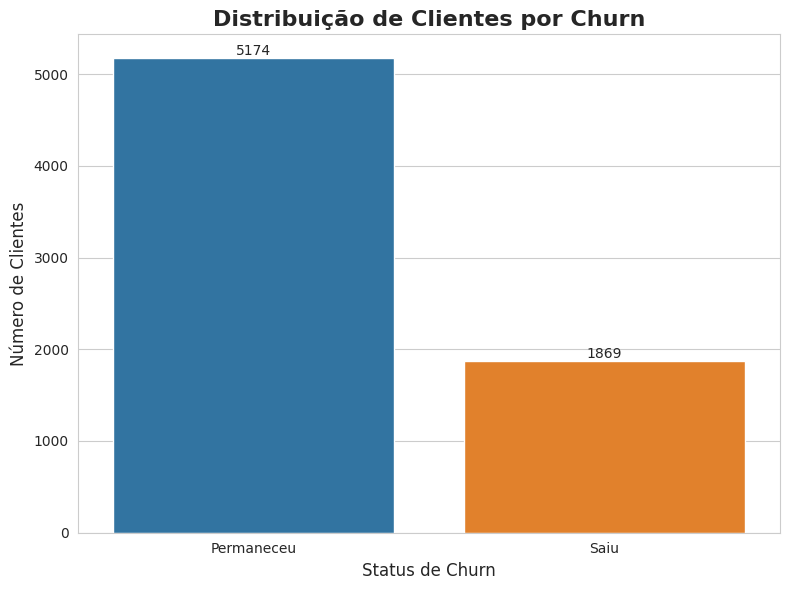

In [70]:
# Gráfico com Acessibilidade, e algumas mudanças

plt.figure(figsize=(8, 6)) # Aumenta o tamanho da figura para melhor visualização
sns.set_style("whitegrid") # Adiciona um fundo quadriculado leve para facilitar a leitura

# Paleta de cores mais contrastante e acessível, ideal para daltônicos
cores = ["#1f77b4", "#ff7f0e"] # Azul para "Permaneceu", Laranja para "Saiu" (exemplo)

sns.countplot(data=df_normalizado, x='Churn', palette=cores)

plt.title('Distribuição de Clientes por Churn', fontsize=16, fontweight='bold') # Título maior e em negrito
plt.xlabel('Status de Churn', fontsize=12) # Rótulo do eixo X mais genérico
plt.ylabel('Número de Clientes', fontsize=12) # Rótulo do eixo Y
plt.xticks([0, 1], ['Permaneceu', 'Saiu']) # Renomeia os ticks para facilitar a compreensão

# Adiciona anotações de contagem em cima das barras para clareza
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.tight_layout() # Ajusta automaticamente os parâmetros do subplot para que caibam na área da figura
plt.show()

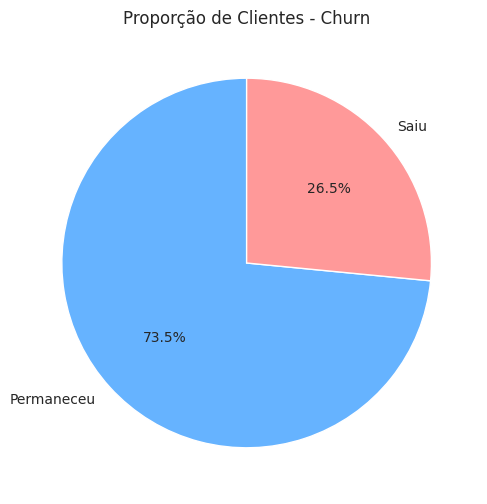

In [71]:
# Gráfico de pizza - Proporção de clientes:

churn_counts = df_normalizado['Churn'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=['Permaneceu', 'Saiu'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Proporção de Clientes - Churn')
plt.show()


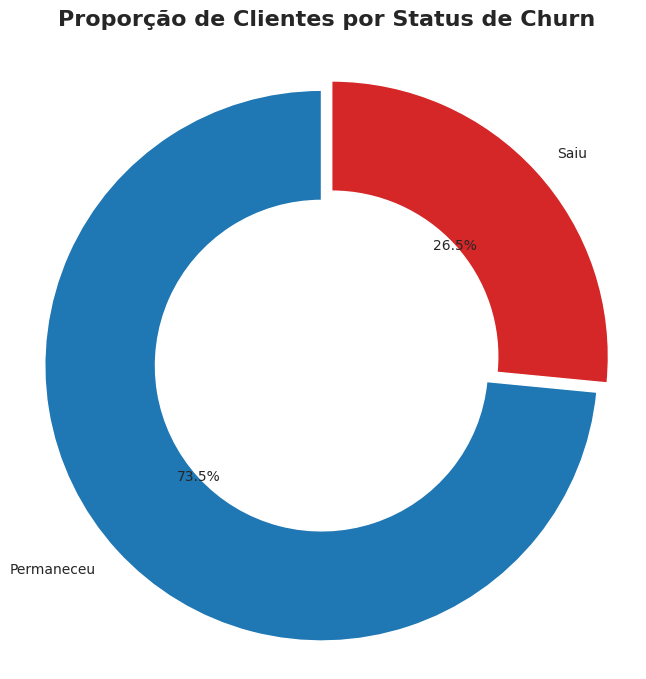

In [72]:
# Gráfico com Acessibilidade

# Supondo que 'df_normalizado' já esteja carregado e contenha a coluna 'Churn'
churn_counts = df_normalizado['Churn'].value_counts()

plt.figure(figsize=(8, 8)) # Aumenta o tamanho da figura para melhor visualização

# Definindo cores mais acessíveis e contrastantes
# Azul escuro para "Permaneceu" e Laranja/Vermelho para "Saiu"
cores = ['#1f77b4', '#d62728']

# Plotando o gráfico de pizza
plt.pie(churn_counts,
        labels=['Permaneceu', 'Saiu'],
        autopct='%1.1f%%',        # Mostra a porcentagem com uma casa decimal
        startangle=90,           # Começa a primeira fatia (Permaneceu) no topo
        colors=cores,            # Aplica as cores definidas
        explode=(0.05, 0),       # Destaca levemente a fatia 'Permaneceu' (ou 'Saiu', se preferir)
        wedgeprops=dict(width=0.4, edgecolor='w')) # Transforma em um "donut" chart para melhor legibilidade
plt.title('Proporção de Clientes por Status de Churn', fontsize=16, fontweight='bold', pad=20) # Título maior, negrito e com espaçamento
plt.axis('equal') # Garante que o gráfico de pizza seja um círculo perfeito
plt.show()

In [73]:
#  Selecionar as variáveis categóricas de interesse
categorical_vars = [
    'Genero',
    'Tem_Parceiro',
    'Tem_Dependentes',
    'Servico_Telefonico',
    'phone.MultipleLines',
    'Seguranca_Online',
    'Backup_Online',
    'Protecao_Dispositivo',
    'Suporte_Tecnico',
    'TV_Streaming',
    'Filmes_Streaming',
    'account.PaperlessBilling'
]

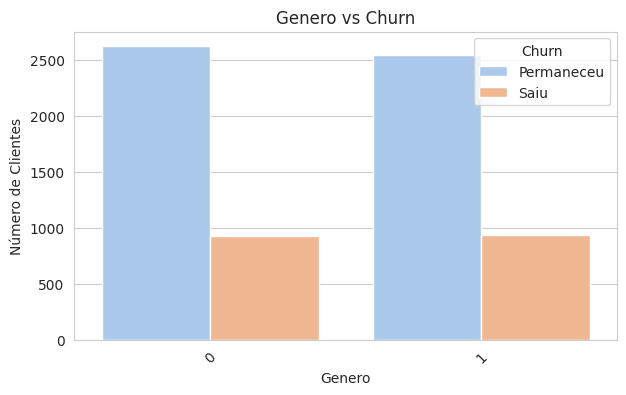

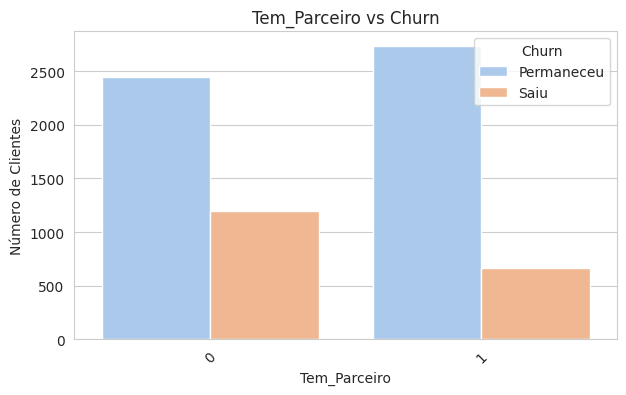

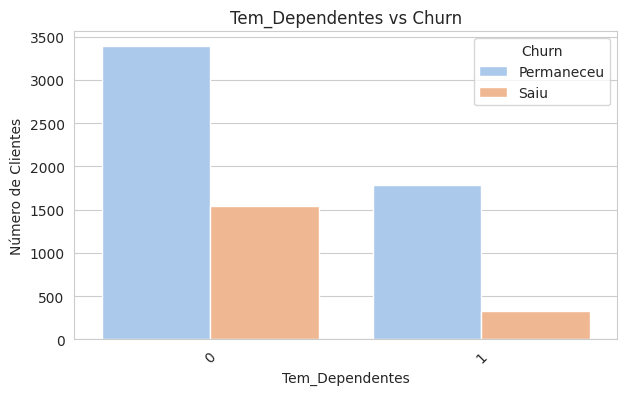

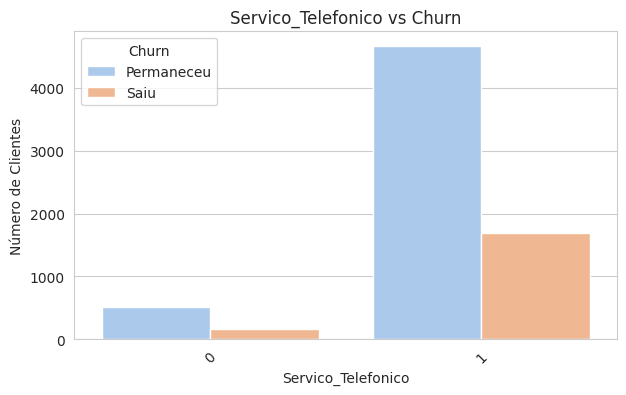

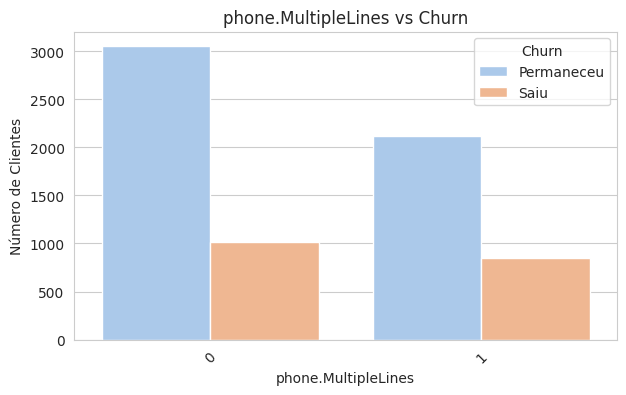

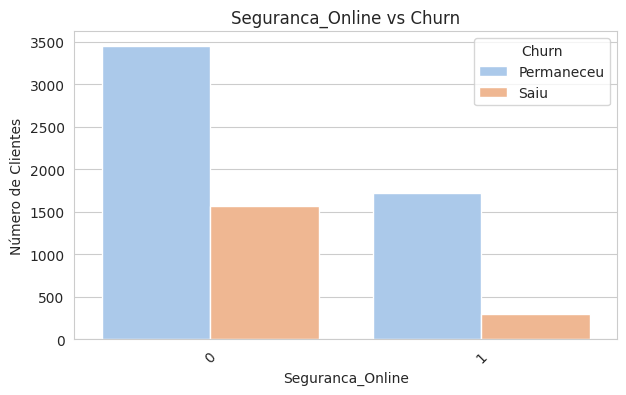

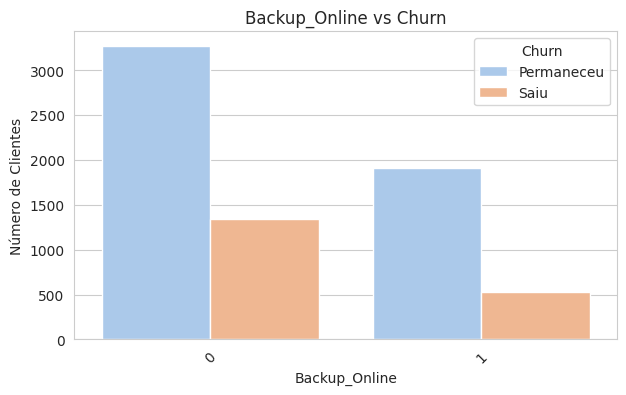

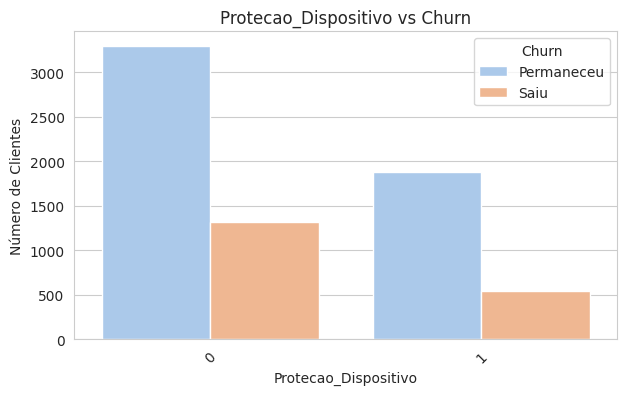

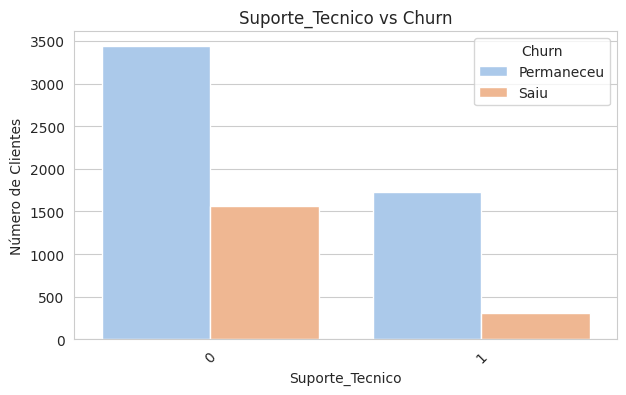

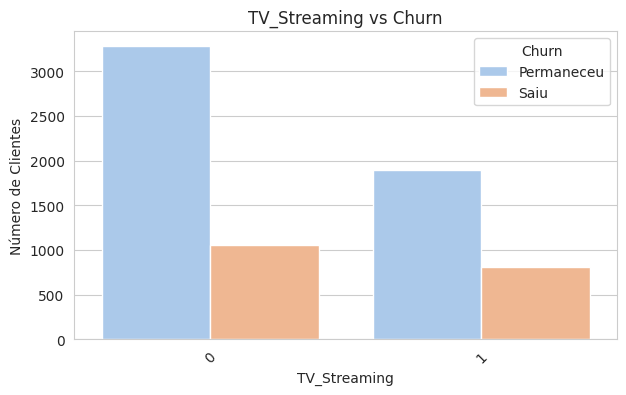

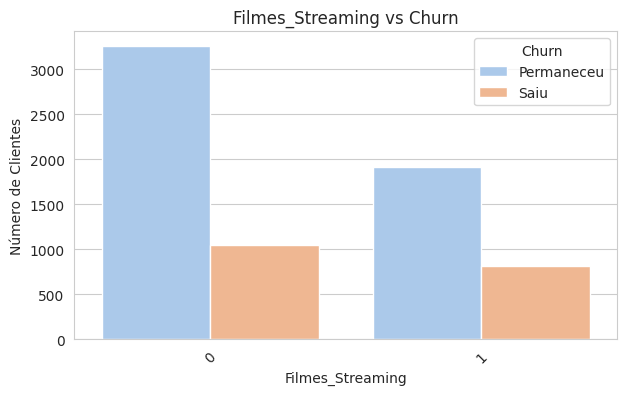

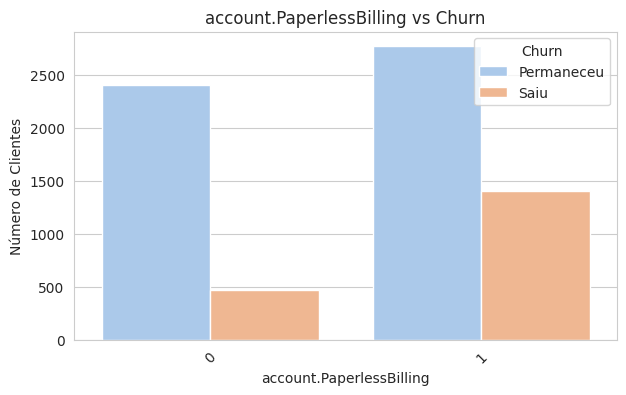

In [74]:
# Criar gráficos para cada variável categórica:

for col in categorical_vars:
    plt.figure(figsize=(7,4))
    sns.countplot(data=df_normalizado, x=col, hue='Churn', palette='pastel')
    plt.title(f'{col} vs Churn')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
    plt.xticks(rotation=45)
    plt.legend(title='Churn', labels=['Permaneceu', 'Saiu'])
    plt.show()


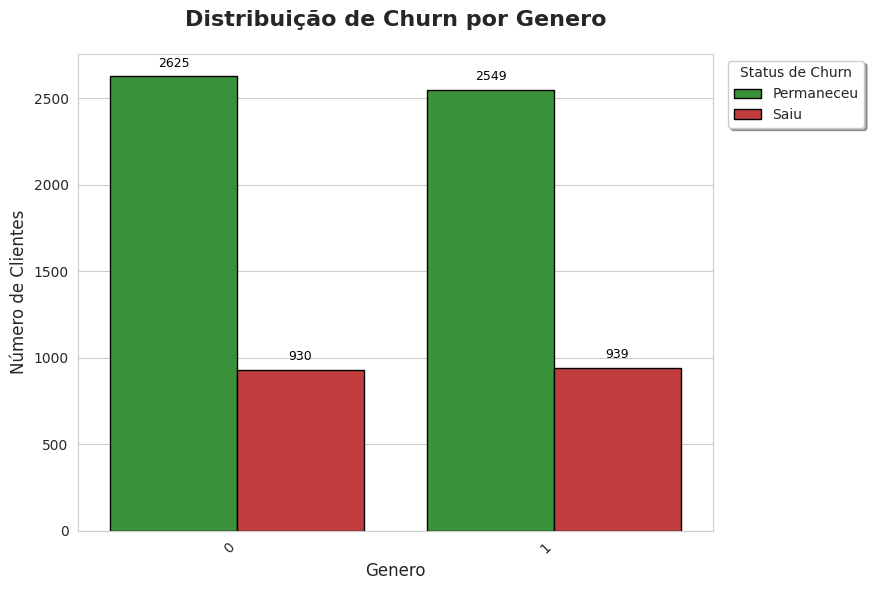

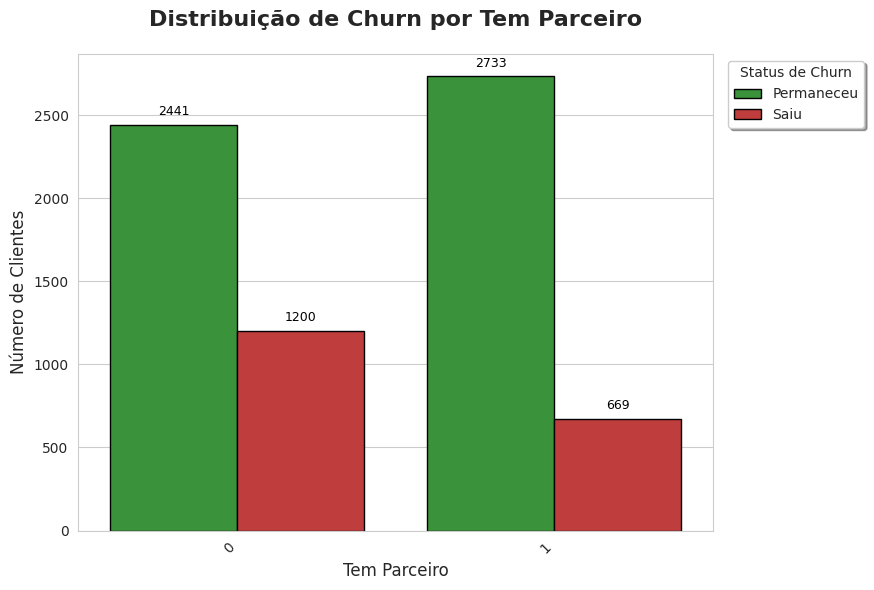

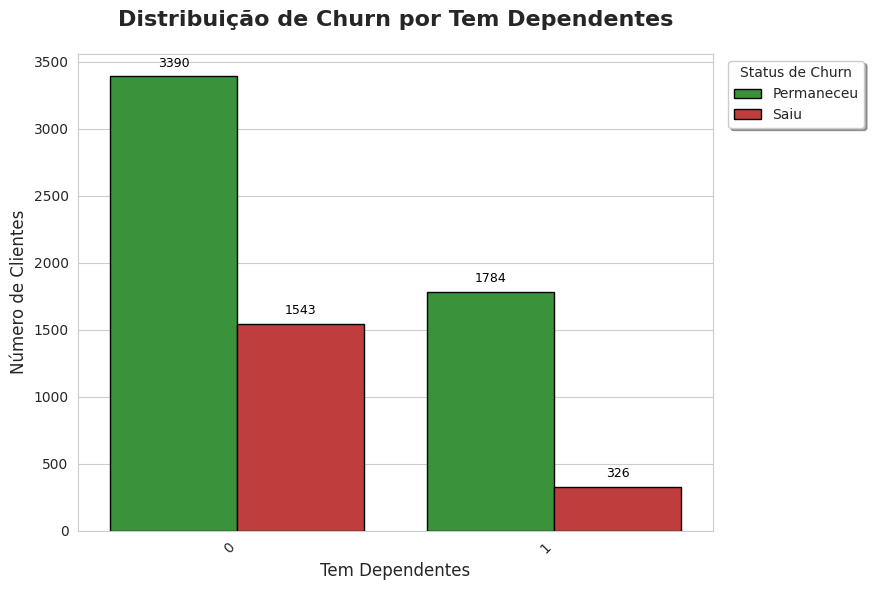

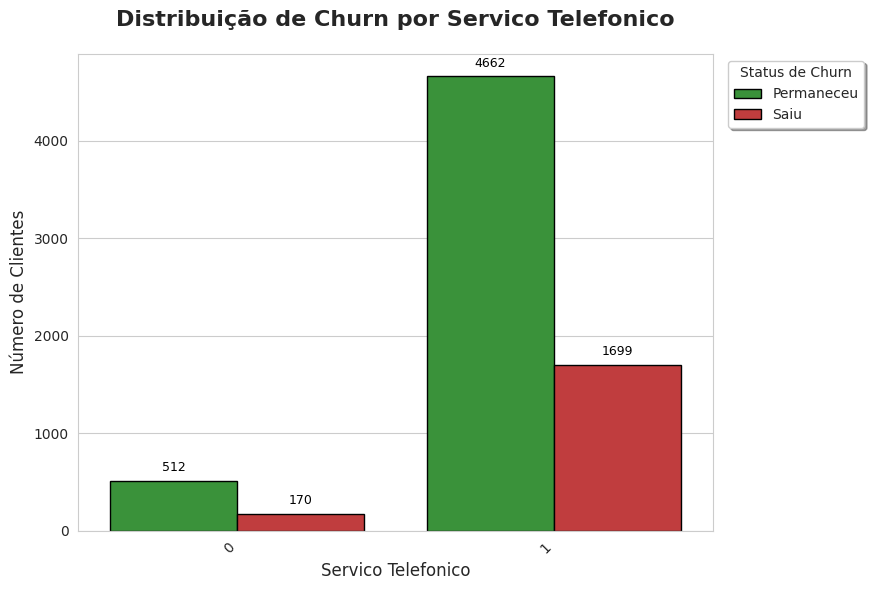

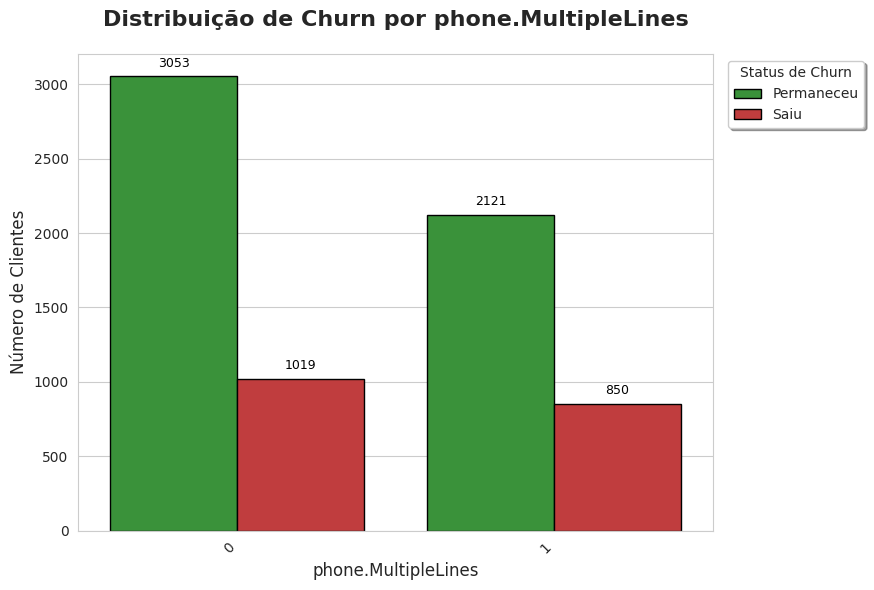

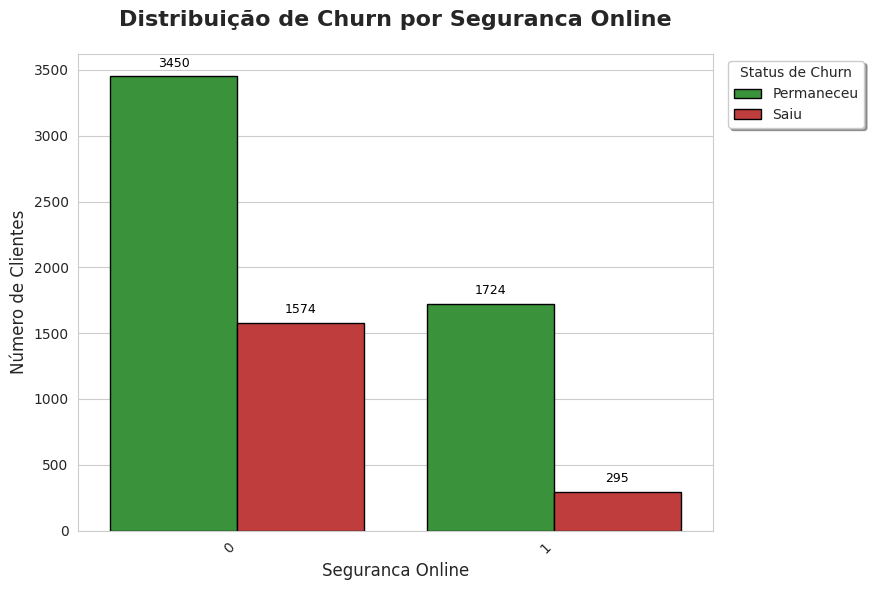

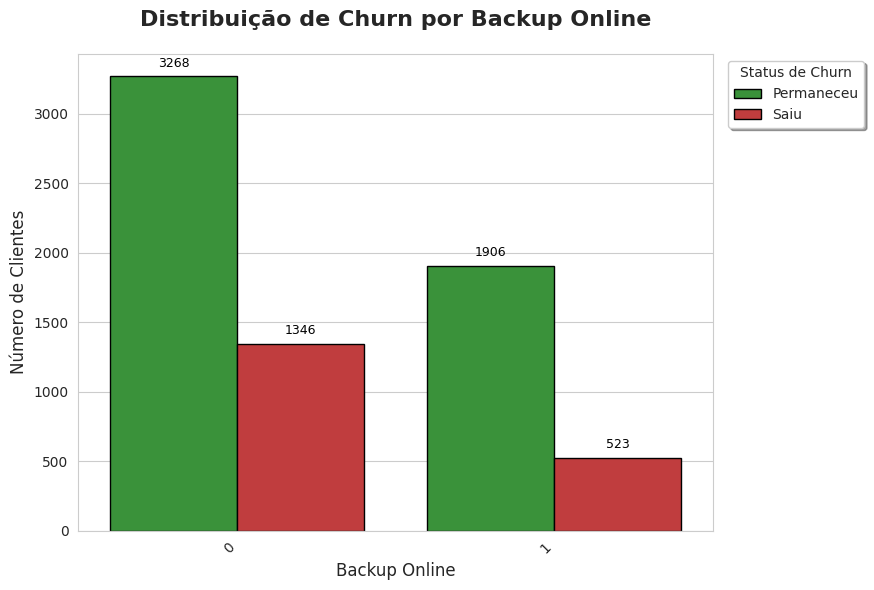

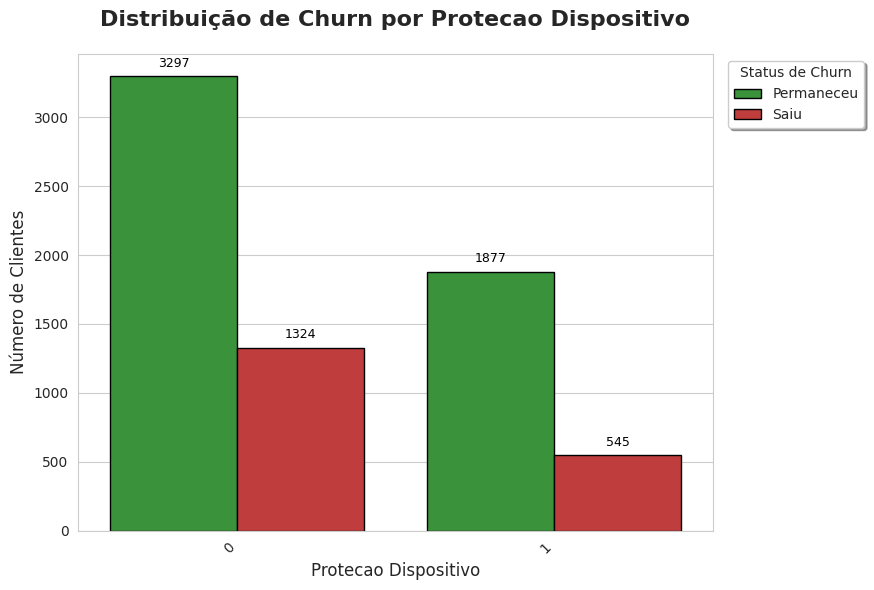

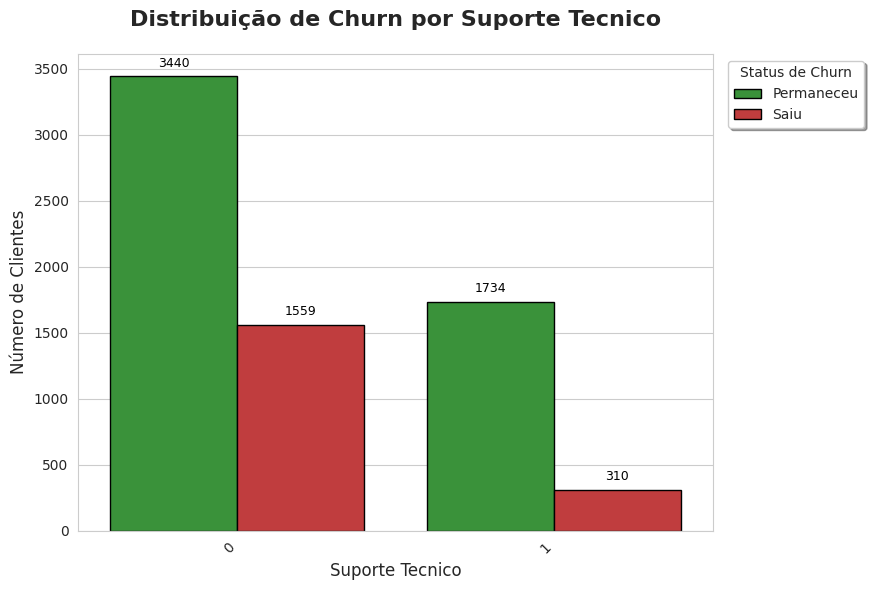

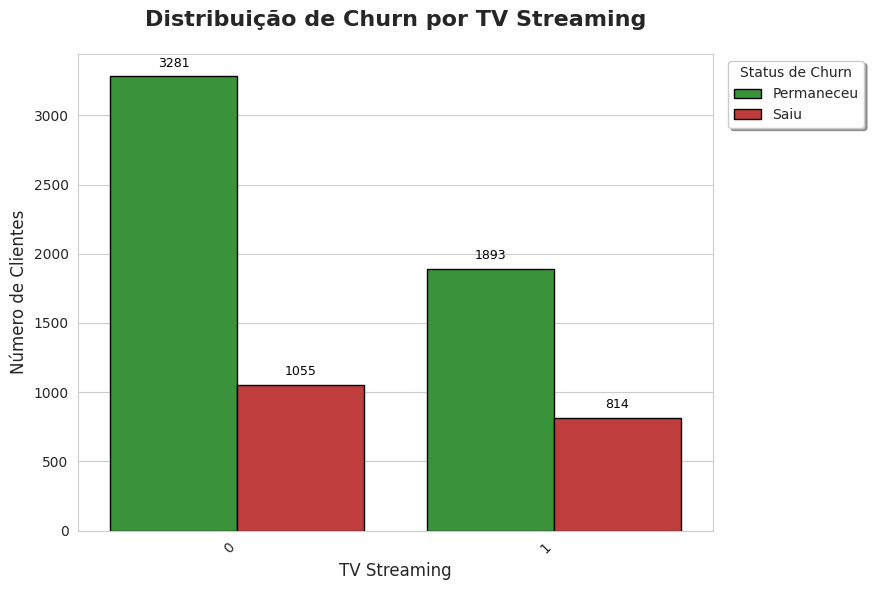

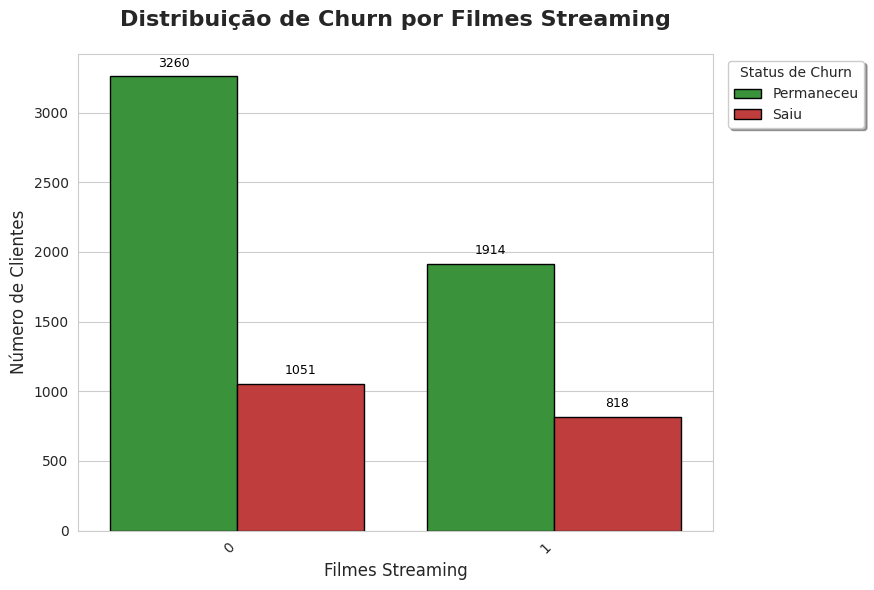

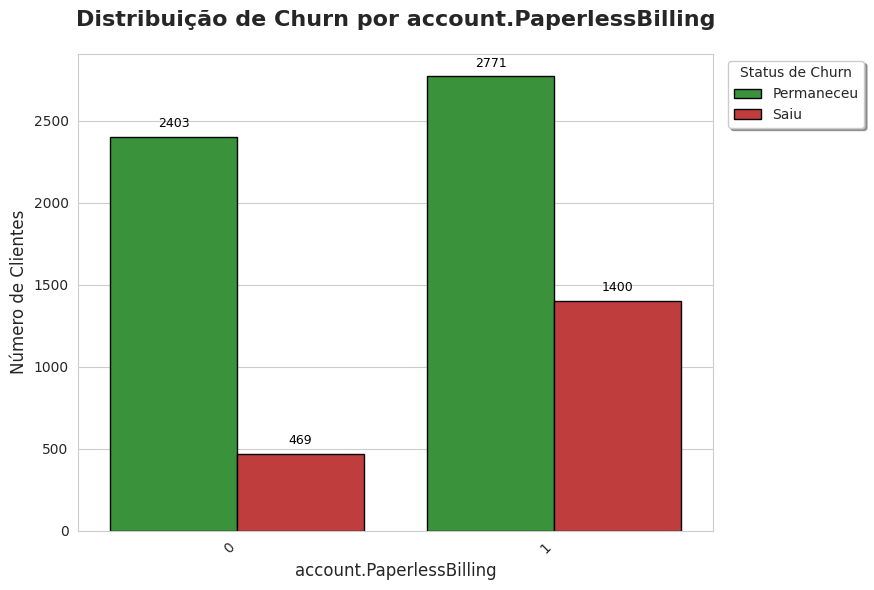

In [75]:
# Gráfico com acessibilidade

import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que 'df_normalizado' e 'categorical_vars' já estejam definidos

# Definindo uma paleta de cores mais robusta e acessível (ex: cores da paleta 'viridis' ou 'cividis')
# Você pode escolher outras paletas que ache mais adequadas para contraste
cores_churn = {0: '#2ca02c', 1: '#d62728'} # Verde para Permaneceu, Vermelho para Saiu (mais intuitivo)

for col in categorical_vars:
    plt.figure(figsize=(9, 6)) # Aumenta o tamanho da figura para melhor visualização
    sns.set_style("whitegrid") # Adiciona um fundo quadriculado leve

    sns.countplot(data=df_normalizado, x=col, hue='Churn', palette=cores_churn, edgecolor='black')

    # Ajustes no título e rótulos
    plt.title(f'Distribuição de Churn por {col.replace("_", " ")}', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel(col.replace("_", " "), fontsize=12) # Remove underscores do rótulo do eixo X
    plt.ylabel('Número de Clientes', fontsize=12)

    # Rotação dos ticks no eixo X para evitar sobreposição (ajuste se necessário)
    plt.xticks(rotation=45, ha='right', fontsize=10) # 'ha=right' alinha o texto à direita do tick
    plt.yticks(fontsize=10)

    # Melhorando a legenda
    plt.legend(title='Status de Churn', labels=['Permaneceu', 'Saiu'],
               loc='upper right', bbox_to_anchor=(1.25, 1), frameon=True, fancybox=True, shadow=True)

    # Adicionar contagens exatas em cima das barras para maior clareza
    for p in plt.gca().patches:
        height = p.get_height()
        if height > 0: # Para evitar rótulos em barras com altura zero
            plt.gca().annotate(f'{int(height)}',
                               (p.get_x() + p.get_width() / 2., height),
                               ha='center', va='bottom', xytext=(0, 5),
                               textcoords='offset points', fontsize=9, color='black')

    plt.tight_layout() # Ajusta automaticamente os parâmetros do subplot
    plt.show()

In [77]:
# Variáveis numéricas elaboradas

numeric_vars = [
    'customer.tenure',       # Tempo de contrato (meses)
    'Cobranca_Mensal',       # Valor pago por mês
    'Cobranca_Total',        # Total gasto
    'account.Contas_Diarias' # Gasto diário
]


<ipython-input-78-9b6e4c9d678d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_normalizado, x='Churn', y=col, palette='pastel')


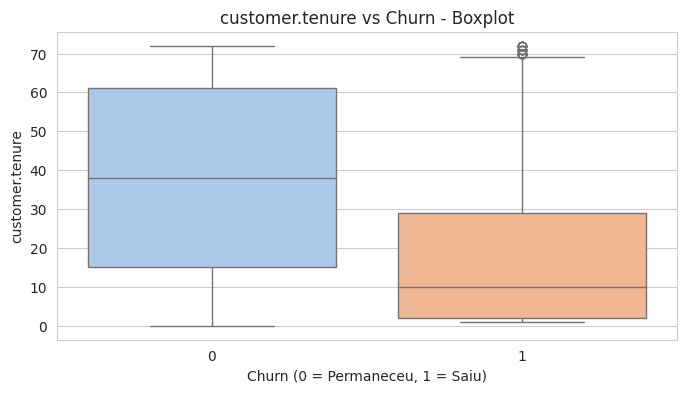

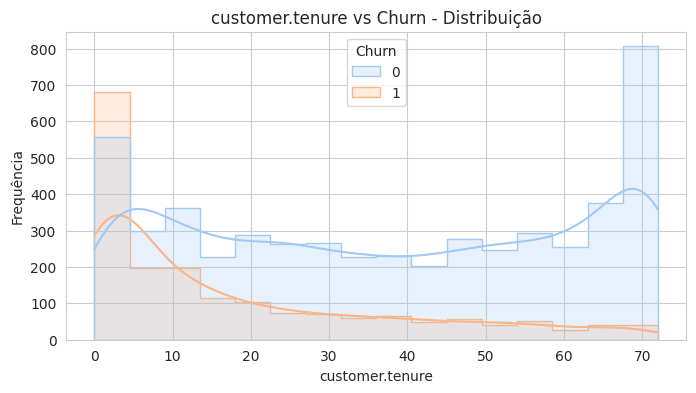

<ipython-input-78-9b6e4c9d678d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_normalizado, x='Churn', y=col, palette='pastel')


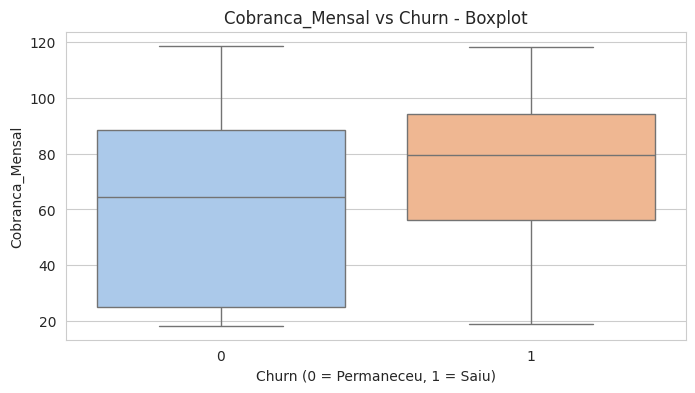

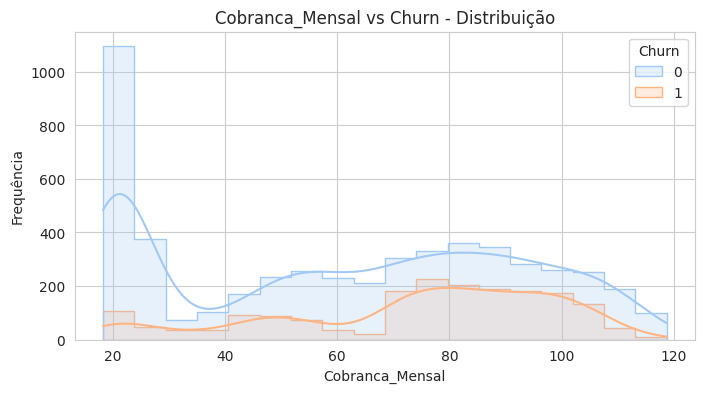

<ipython-input-78-9b6e4c9d678d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_normalizado, x='Churn', y=col, palette='pastel')


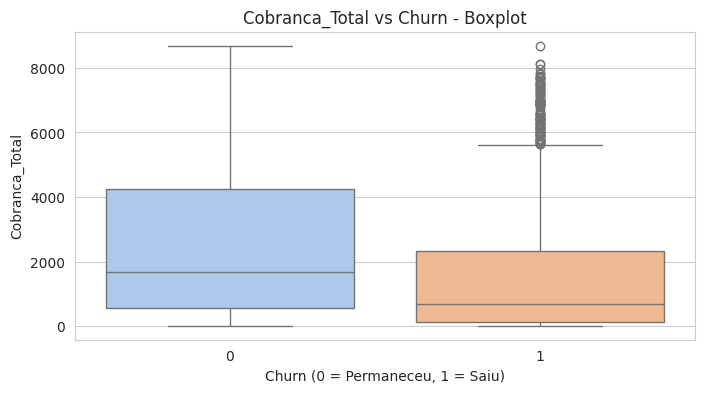

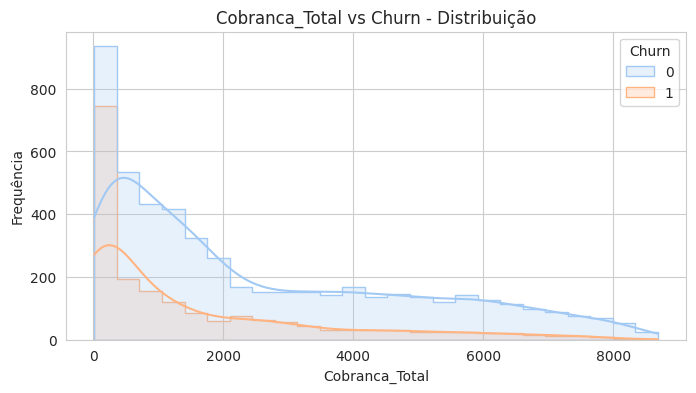

<ipython-input-78-9b6e4c9d678d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_normalizado, x='Churn', y=col, palette='pastel')


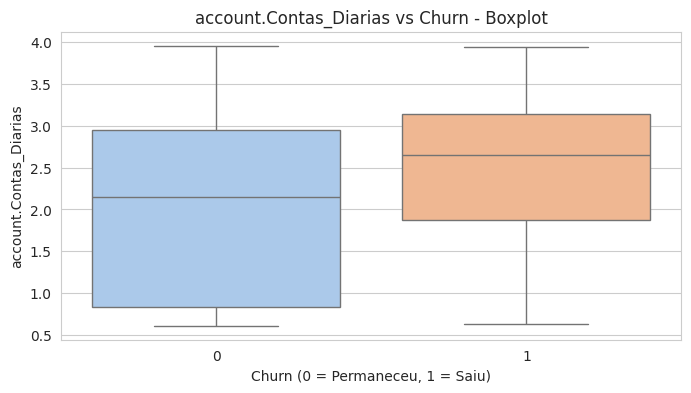

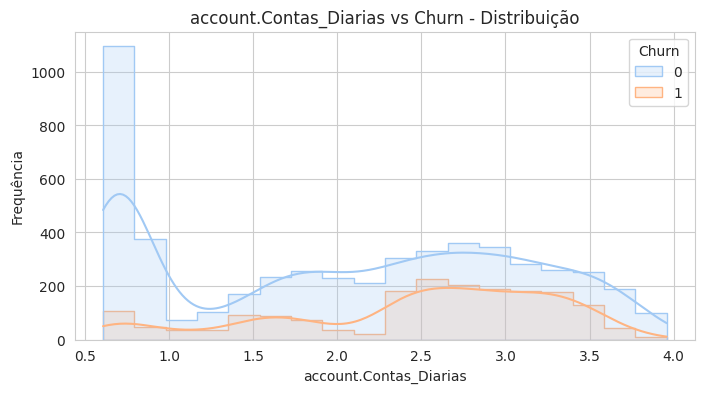

In [78]:
# Criação dos gráficos

for col in numeric_vars:
    plt.figure(figsize=(8,4))

    # Boxplot
    sns.boxplot(data=df_normalizado, x='Churn', y=col, palette='pastel')
    plt.title(f'{col} vs Churn - Boxplot')
    plt.xlabel('Churn (0 = Permaneceu, 1 = Saiu)')
    plt.ylabel(col)
    plt.show()

    # Histograma com densidade
    plt.figure(figsize=(8,4))
    sns.histplot(data=df_normalizado, x=col, hue='Churn', kde=True, element="step", palette='pastel')
    plt.title(f'{col} vs Churn - Distribuição')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()


<ipython-input-79-bb7a57898c81>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_normalizado, x='Churn', y=col, palette=cores_churn, linewidth=1.5, fliersize=4)


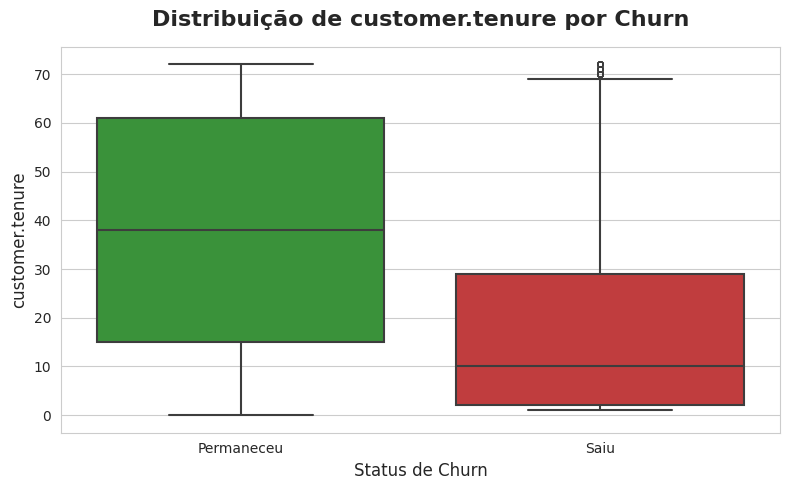

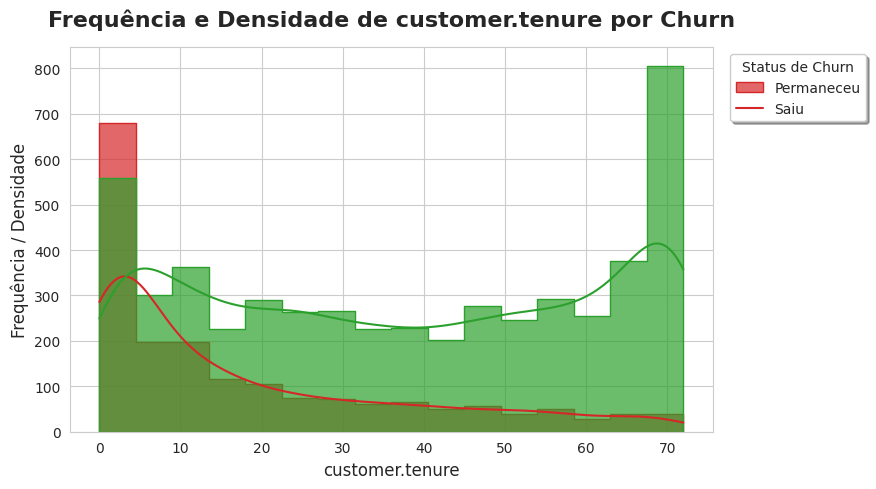

<ipython-input-79-bb7a57898c81>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_normalizado, x='Churn', y=col, palette=cores_churn, linewidth=1.5, fliersize=4)


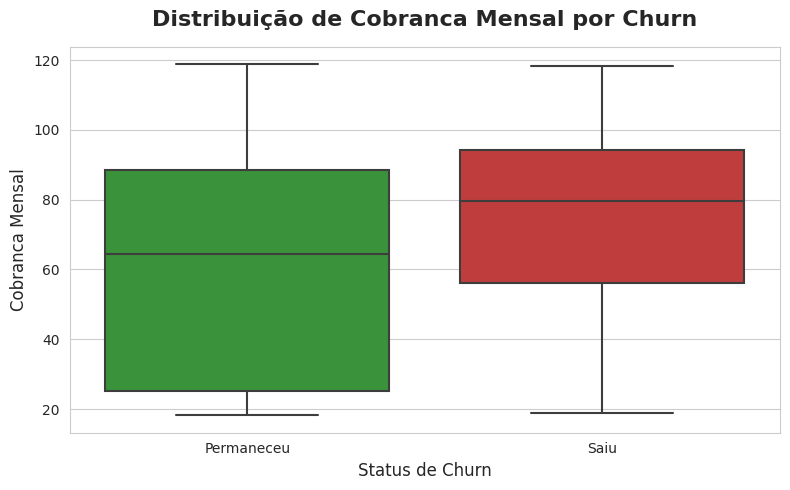

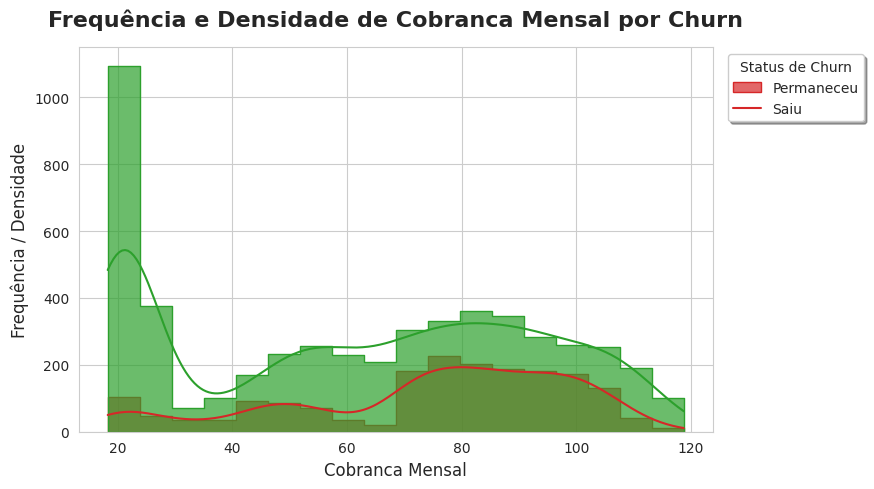

<ipython-input-79-bb7a57898c81>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_normalizado, x='Churn', y=col, palette=cores_churn, linewidth=1.5, fliersize=4)


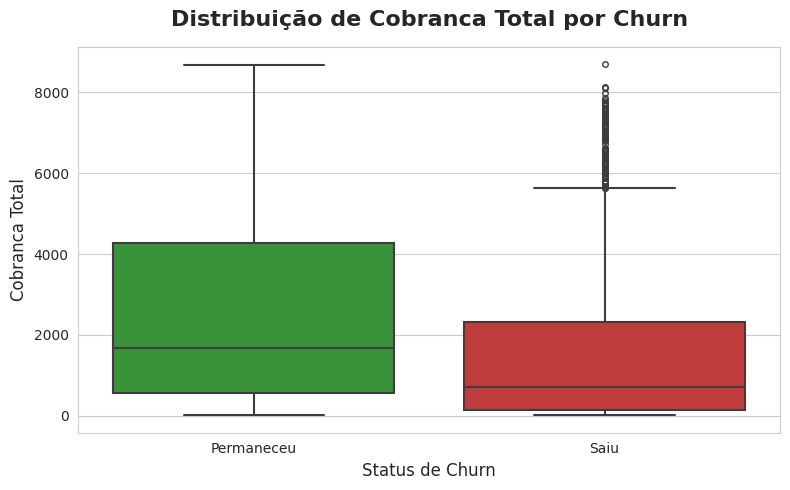

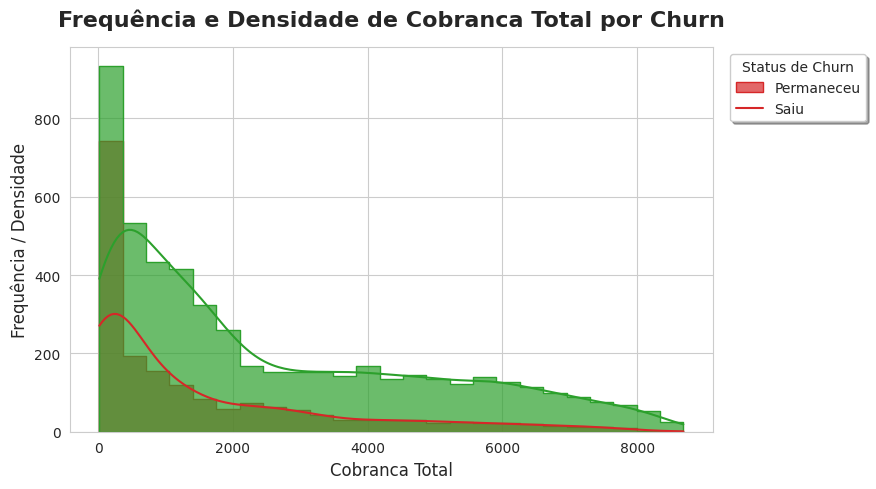

<ipython-input-79-bb7a57898c81>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_normalizado, x='Churn', y=col, palette=cores_churn, linewidth=1.5, fliersize=4)


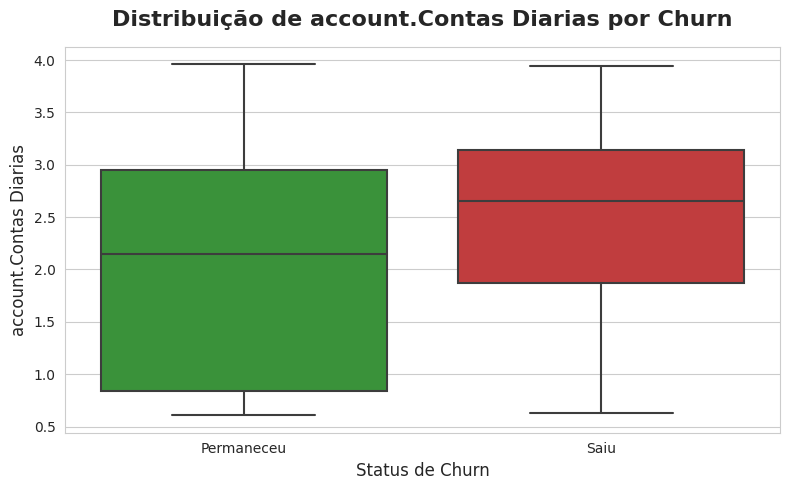

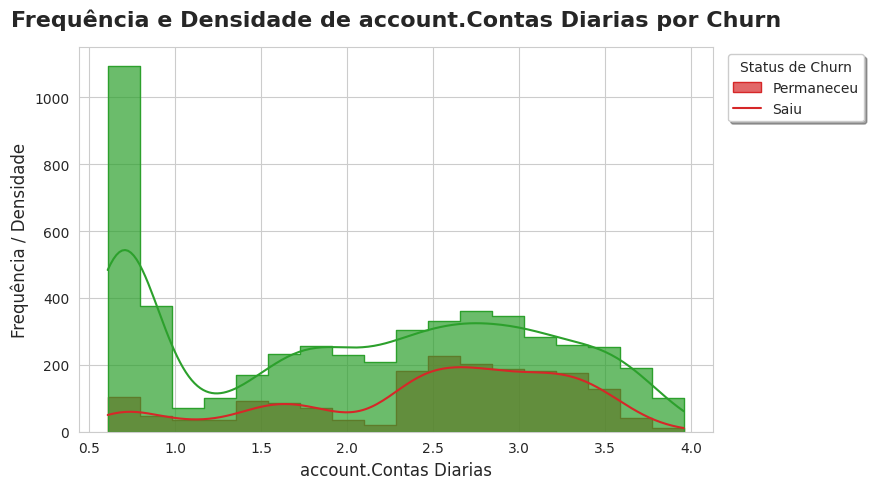

In [79]:
# Gráficos com acessibilidade

# CORREÇÃO AQUI: Converter a coluna 'Churn' para string/object
# Isso garante que as chaves do dicionário de paleta sejam sempre strings
df_normalizado['Churn'] = df_normalizado['Churn'].astype(str)

# Definindo uma paleta de cores consistente e acessível para o Churn
# Agora as chaves serão strings '0' e '1' para corresponder ao tipo da coluna 'Churn'
cores_churn = {'0': '#2ca02c', '1': '#d62728'} # Verde para Permaneceu ('0'), Vermelho para Saiu ('1')

for col in numeric_vars:
    # --- Boxplot ---
    plt.figure(figsize=(8, 5))
    sns.set_style("whitegrid")

    # Como 'Churn' agora é string, as chaves '0' e '1' do dicionário funcionarão
    sns.boxplot(data=df_normalizado, x='Churn', y=col, palette=cores_churn, linewidth=1.5, fliersize=4)

    plt.title(f'Distribuição de {col.replace("_", " ")} por Churn', fontsize=16, fontweight='bold', pad=15)
    plt.xlabel('Status de Churn', fontsize=12)
    plt.ylabel(f'{col.replace("_", " ")}', fontsize=12)

    # Renomear os ticks do eixo X para clareza (ainda são 0 e 1, mas o Seaborn lida com eles como strings)
    # Aqui, a lista de ticks ([0, 1]) ainda se refere às posições dos rótulos.
    # O importante é que a coluna 'Churn' que está sendo usada para mapear as cores é de string.
    plt.xticks([0, 1], ['Permaneceu', 'Saiu'], fontsize=10)
    plt.yticks(fontsize=10)

    plt.tight_layout()
    plt.show()

    # --- Histograma com Densidade (KDE) ---
    plt.figure(figsize=(9, 5))
    sns.set_style("whitegrid")

    # 'hue'='Churn' agora mapeará corretamente para as chaves de string no dicionário
    sns.histplot(data=df_normalizado, x=col, hue='Churn', kde=True, element="step",
                 palette=cores_churn, alpha=0.7, linewidth=1, common_norm=False)

    plt.title(f'Frequência e Densidade de {col.replace("_", " ")} por Churn', fontsize=16, fontweight='bold', pad=15)
    plt.xlabel(f'{col.replace("_", " ")}', fontsize=12)
    plt.ylabel('Frequência / Densidade', fontsize=12)

    # Melhorando a legenda (labels ainda precisam ser strings '0' e '1' ou 'Permaneceu'/'Saiu')
    plt.legend(title='Status de Churn', labels=['Permaneceu', 'Saiu'],
               loc='upper right', bbox_to_anchor=(1.25, 1), frameon=True, fancybox=True, shadow=True)

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.tight_layout()
    plt.show()

# **📄Relatorio Final**

<ipython-input-81-62f9f621f2d8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_normalizado, x='Churn', palette='pastel')


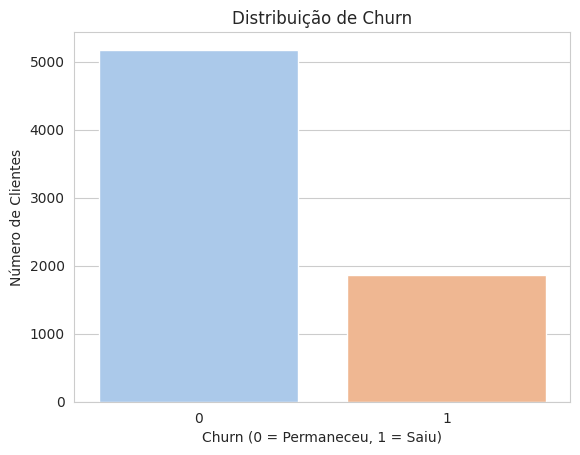

In [81]:
# Distribuição do Churn

sns.countplot(data=df_normalizado, x='Churn', palette='pastel')
plt.title('Distribuição de Churn')
plt.xlabel('Churn (0 = Permaneceu, 1 = Saiu)')
plt.ylabel('Número de Clientes')
plt.show()

'''O gráfico demonstra visualmente a quantidade de clientes que a empresa conseguiu reter versus a quantidade de clientes que perdeu.
A maioria dos clientes (5174) continua com a empresa ("Permaneceu").
Um número significativo de clientes (1869) deixou a empresa ("Saiu").

Essa visualização é muito útil para entender a retenção de clientes. Fica claro que, embora a maioria dos clientes tenha permanecido,
a quantidade de clientes que saíram também é considerável e pode ser um ponto de atenção para a empresa investigar as causas desse
churn e tentar reduzi-lo.'''


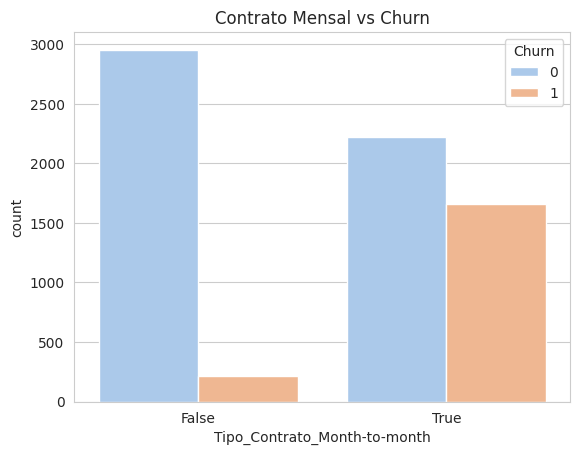

In [83]:
# Análise das Variáveis Categóricas
sns.countplot(data=df_normalizado, x='Tipo_Contrato_Month-to-month', hue='Churn', palette='pastel')
plt.title('Contrato Mensal vs Churn')
plt.show()


<ipython-input-85-2a9eace8a2d7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_normalizado, x='Churn', y='customer.tenure', palette='pastel')


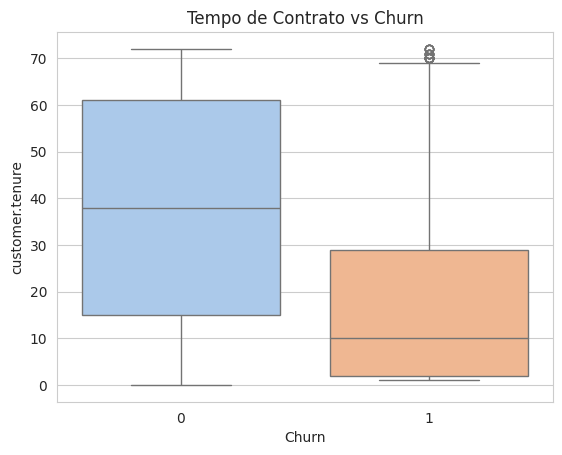

In [85]:
# Análise das Variáveis Numéricas
sns.boxplot(data=df_normalizado, x='Churn', y='customer.tenure', palette='pastel')
plt.title('Tempo de Contrato vs Churn')
plt.show()


# Análise da variável customer.tenure em relação ao Churn

**Histograma com Densidade (KDE)**

A maior parte dos clientes que saíram (em vermelho) tinha um tempo de contrato muito baixo, concentrado entre 0 e 10 meses.

A densidade de clientes que permaneceram (em verde) é mais distribuída ao longo de todo o período, mas com dois picos principais: um também no início (0-10 meses) e outro ao redor de 70 meses.

Nota-se que a maioria dos clientes que permanecem têm uma distribuição bimodal: iniciantes e clientes antigos com mais de 60 meses.

Já os clientes que saem têm uma densidade muito maior nos primeiros meses e diminuem drasticamente após os 20 meses.

**Boxplot**

A mediana do tempo de permanência para clientes que saíram está abaixo dos 10 meses, mostrando que a evasão ocorre majoritariamente no início do relacionamento.

Clientes que permanecem apresentam uma mediana muito mais alta, perto dos 40 meses, com uma distribuição mais espalhada até cerca de 72 meses.

Há a presença de outliers entre os clientes que saíram, mas em menor quantidade e dispersos até 69 meses.

**Inferências importantes**

✅ A probabilidade de churn é muito maior nos primeiros meses de contrato.
✅ Clientes que conseguem passar dos primeiros 12-20 meses tendem a ficar por mais tempo.
✅ O comportamento sugere uma necessidade de melhor onboarding e fidelização logo no início da contratação.

**Recomendações estratégicas**:

Desenvolver programas de engajamento e benefícios exclusivos para clientes nos primeiros 6 a 12 meses.

Implementar pesquisas de satisfação e ações proativas para entender as necessidades dos novos clientes.

Criar ofertas de longo prazo (como contratos anuais com desconto) que incentivem a permanência além do período crítico.

Monitorar mais de perto os clientes com menos de 20 meses de permanência, pois é onde o churn é mais provável.

# Gráfico de Frequência e Densidade: Cobranca Mensal por Churn

Distribuição Diferente:

Clientes que permaneceram (em verde) apresentam distribuição mais concentrada em dois picos:

Um grupo relevante com valores mais baixos, em torno de R 20 a R 40.

Outro grupo com valores moderados a altos, entre R 60 e R 90.

Já os clientes que saíram (em vermelho) concentram-se mais fortemente nas faixas intermediárias e altas de cobrança mensal, entre R  60 e R  100.

Tendência de Churn:

Clientes com cobranças mensais mais elevadas parecem ter maior tendência a cancelar o serviço.

Indica que valores altos podem ser um fator de insatisfação ou insustentabilidade para alguns perfis de cliente.

**Boxplot: Distribuição de Cobranca Mensal por Churn**

Mediana: Clientes que permaneceram têm mediana em torno de R 65. Clientes que saíram têm mediana mais alta, próxima de R 80.

Amplitude: A amplitude de valores é semelhante nos dois grupos, com limites inferiores em torno de R 20 e superiores próximos de R 120. Porém, quem saiu está mais concentrado na faixa alta.

Outliers: Poucos outliers visíveis, indicando que os dados são razoavelmente homogêneos dentro de cada grupo.

**Interpretação e Insights**:

A Cobrança Mensal é uma variável importante na explicação do Churn.

Clientes que saem tendem a pagar mais mensalmente.

Isso pode indicar: Que os clientes com planos ou serviços mais caros são mais sensíveis a problemas ou insatisfações. Que clientes de planos mais simples, com menor cobrança, são mais propensos a permanecer, talvez por ter menos alternativas ou estar mais satisfeitos com o custo-benefício.

**Recomendações com Base na Análise**

*Revisar Políticas de Preço*:

Avaliar se planos mais caros entregam valor percebido pelos clientes.

Estudar possibilidades de ajuste ou flexibilização dos planos mais caros.

*Melhorar a Comunicação de Benefícios*:

Destacar o valor agregado dos planos mais caros para evitar percepção de custo excessivo.

*Oferecer Planos Personalizados*:

Propor ofertas ou descontos progressivos para clientes com mensalidades altas.

Programas de fidelidade ou recompensas podem ajudar a reduzir a evasão nesse segmento.

*Análise Complementar*:

Investigar se há correlação entre tipo de contrato (ex.: mês a mês ou anual) e essa propensão ao Churn em clientes de maior cobrança mensal.

# Cobranca Mensal (Monthly Charges)
📊 **Histograma + KDE**

A distribuição para clientes que permaneceram apresenta maior concentração de valores baixos a moderados de cobrança mensal.

Já os clientes que saíram têm uma concentração um pouco maior nos valores intermediários a altos de cobrança mensal.

Nota-se uma sobreposição nas distribuições, mas existe uma leve tendência de clientes que pagam mais abandonarem o serviço.

📦 **Boxplot**

A mediana da Cobranca Mensal é maior para os clientes que saíram.

A dispersão dos valores também é ampla para ambos os grupos, mas com uma tendência maior de saída nos clientes que pagam mensalidades mais elevadas.

✅ **Inferência**:

Clientes com cobranças mensais mais altas tendem a apresentar maior propensão ao churn. Isso sugere que o valor mensal pode impactar na decisão de cancelamento, principalmente se o cliente não perceber valor proporcional ao custo.

# Cobranca Total (Total Charges)

📊 **Histograma + KDE**

Clientes que permaneceram possuem uma distribuição mais espalhada, incluindo valores altos de cobrança total.

Clientes que saíram concentram-se fortemente em valores baixos de cobrança total.

Isso indica que muitos clientes que cancelam são aqueles com menos tempo de relacionamento com a empresa (pois a cobrança total tende a aumentar com o tempo).

📦 **Boxplot**

A mediana da cobrança total para quem saiu é significativamente mais baixa.

Clientes que permaneceram têm cobranças totais mais altas, o que reforça que o tempo de relacionamento está associado com a permanência.

✅ **Inferência**:

Clientes que ficam menos tempo na empresa tendem a cancelar mais rapidamente, acumulando, assim, um valor total pago muito menor. Isso sugere que um dos principais fatores de churn é a baixa retenção no início do ciclo.

**Recomendações com base na análise**:

*Programas de Onboarding*:
Criar ações para aumentar a satisfação e o engajamento dos novos clientes nos primeiros meses de contrato, prevenindo o churn precoce.

*Ofertas Personalizadas*:
Rever planos com valores muito elevados, oferecendo benefícios adicionais ou descontos para clientes de risco, especialmente aqueles com menor tempo de contrato.

*Monitoramento Proativo*:
Implementar sistemas que alertem quando clientes com perfis de risco (alto custo mensal e pouco tempo de relacionamento) apresentem sinais de insatisfação.